##                                Pandas Project 

#### Importing libraries and data

In [247]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import sympy as sp
import scipy.stats as stats

%matplotlib inline
sp.init_printing()

In [248]:
data = pd.read_excel("Voice_EGG.xlsx")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50); data

,Filename,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,Lphon,Vowel,Oral/Nasal,Tone From txtgrid,Tone Cont,Tone Cat,No. Tone,Tone,Tphon,CorV,Aspiration,Duration,seg_Start,seg_End,CQ_mean,CQ_means001,CQ_means002,CQ_means003,CQ_means004,CQ_means005,CQ_means006,CQ_means007,CQ_means008,CQ_means009,CQ_H_mean,CQ_H_means001,CQ_H_means002,CQ_H_means003,CQ_H_means004,CQ_H_means005,CQ_H_means006,CQ_H_means007,CQ_H_means008,CQ_H_means009,CQ_PM_mean,CQ_PM_means001,CQ_PM_means002,CQ_PM_means003,CQ_PM_means004,CQ_PM_means005,CQ_PM_means006,CQ_PM_means007,CQ_PM_means008,CQ_PM_means009,CQ_HT_mean,CQ_HT_means001,CQ_HT_means002,CQ_HT_means003,CQ_HT_means004,CQ_HT_means005,CQ_HT_means006,CQ_HT_means007,CQ_HT_means008,CQ_HT_means009,peak_Vel_mean,peak_Vel_means001,peak_Vel_means002,peak_Vel_means003,peak_Vel_means004,peak_Vel_means005,peak_Vel_means006,peak_Vel_means007,peak_Vel_means008,peak_Vel_means009,peak_Vel_Time_mean,peak_Vel_Time_means001,peak_Vel_Time_means002,peak_Vel_Time_means003,peak_Vel_Time_means004,peak_Vel_Time_means005,peak_Vel_Time_means006,peak_Vel_Time_means007,peak_Vel_Time_means008,peak_Vel_Time_means009,min_Vel_mean,min_Vel_means001,min_Vel_means002,min_Vel_means003,min_Vel_means004,min_Vel_means005,min_Vel_means006,min_Vel_means007,min_Vel_means008,min_Vel_means009,min_Vel_Time_mean,min_Vel_Time_means001,min_Vel_Time_means002,min_Vel_Time_means003,min_Vel_Time_means004,min_Vel_Time_means005,min_Vel_Time_means006,min_Vel_Time_means007,min_Vel_Time_means008,min_Vel_Time_means009,SQ2-SQ1_mean,SQ2-SQ1_means001,SQ2-SQ1_means002,SQ2-SQ1_means003,SQ2-SQ1_means004,SQ2-SQ1_means005,SQ2-SQ1_means006,SQ2-SQ1_means007,SQ2-SQ1_means008,SQ2-SQ1_means009,SQ4-SQ3_mean,SQ4-SQ3_means001,SQ4-SQ3_means002,SQ4-SQ3_means003,SQ4-SQ3_means004,SQ4-SQ3_means005,SQ4-SQ3_means006,SQ4-SQ3_means007,SQ4-SQ3_means008,SQ4-SQ3_means009,ratio_mean,ratio_means001,ratio_means002,ratio_means003,ratio_means004,ratio_means005,ratio_means006,ratio_means007,ratio_means008,ratio_means009,Unnamed: 133
0,F1_Xe=31_01.mat,X,Bo,v1,F,1,F1,Bo_F1,L,BL,NaN,C,31,31.0,M,2.0,low,fall_L,C,0,189.080,456.685,645.765,0.455,0.499,0.43,0.457,0.441,0.427,0.451,0.487,0.466,0.469,0.400,0.413,0.381,0.400,0.379,0.384,0.406,0.437,0.407,0.403,0.267,0.225,0.236,0.194,0.237,0.276,0.319,0.295,0.287,0.303,0.523,0.692,0.470,0.566,0.478,0.556,0.538,0.447,0.422,0.657,562.112,483.797,506.295,543.862,561.839,618.222,600.542,602.191,550.226,536.093,557.342,473.061,486.947,507.995,528.727,549.392,570.977,592.111,612.772,633.893,-211.100,-213.550,-187.613,-211.875,-207.356,-228.984,-231.727,-217.190,-206.040,-197.313,558.562,474.044,487.988,508.869,529.805,550.658,572.459,593.476,614.087,635.301,0.508,0.302,0.326,0.486,0.443,0.438,0.788,0.732,0.516,0.391,-0.236,1.723,0.540,-1.149,0.313,-0.197,-1.114,0.471,0.499,-1.812,0.152,0.193,0.094,0.135,0.129,0.125,0.111,0.285,0.232,0.095,NaN
1,F1_Xe=31_01.mat,e=31,Bo,v1,F,1,F1,Bo_F1,L,BL,e=,O,31,31.0,M,2.0,low,fall_L,V,0,282.618,645.765,928.383,0.573,0.514,0.567,0.536,0.550,0.597,0.603,0.613,0.572,0.677,0.504,0.480,0.502,0.477,0.496,0.513,0.532,0.536,0.474,0.578,0.412,0.329,0.470,0.419,0.413,0.436,0.438,0.415,0.375,0.410,0.598,0.532,0.624,0.597,0.587,0.636,0.688,0.606,0.505,0.621,500.279,524.075,573.552,566.646,573.953,555.494,530.328,466.184,281.911,245.304,774.154,660.265,691.818,723.186,754.410,785.145,816.633,848.229,880.057,899.622,-181.312,-195.213,-209.127,-206.534,-229.389,-196.678,-169.184,-139.233,-122.072,-117.445,776.150,661.685,693.920,725.112,756.378,787.318,818.866,850.295,882.123,901.728,0.791,0.451,0.671,0.821,0.765,0.791,0.547,0.496,1.769,0.922,-0.837,0.084,-0.114,-2.257,0.472,0.212,-1.169,-2.607,-0.521,-3.779,0.231,0.126,0.222,0.024,0.304,0.147,0.092,0.089,0.757,0.537,NaN
2,F1_Xe=31_02.mat,X,Bo,v1,F,1,F1,Bo_F1,L,BL,NaN,C,31,31.0,M,2.0,low,fall_L,C,0,137.290,230.498,367.788,0.455,0.364,0.623,0.504,0.559,0.424,0.424,0.378,0.304,0.475,0.396,0.283,0.600,0.430,0.399,0.379,0.373,0.333,0.287,0.421,0.261,0.201,0.477,0.333,0.

#### Data cleaning

##### Gathering general information

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14806 entries, 0 to 14805
Columns: 134 entries, Filename to Unnamed: 133
dtypes: float64(115), int64(2), object(17)
memory usage: 15.1+ MB


Overall a clean spreadsheet not requiring much cleanup.

##### Removing unused and unspecified columns

In [254]:
del data["Unnamed: 133"]

##### Removing duplicates

In [256]:
data.drop_duplicates(inplace=True)

##### Checking wheter numerical data is really a numerical data type and conversion if neccessary

In [258]:
is_numeric_dtype(data['Speaker #'])

True

In [259]:
data._get_numeric_data()

,Speaker #,Tone Cont,No. Tone,Aspiration,Duration,seg_Start,seg_End,CQ_mean,CQ_means001,CQ_means003,CQ_means004,CQ_means005,CQ_means006,CQ_means007,CQ_means008,CQ_means009,CQ_H_mean,CQ_H_means001,CQ_H_means002,CQ_H_means003,CQ_H_means004,CQ_H_means005,CQ_H_means006,CQ_H_means007,CQ_H_means008,CQ_H_means009,CQ_PM_mean,CQ_PM_means001,CQ_PM_means002,CQ_PM_means003,CQ_PM_means004,CQ_PM_means005,CQ_PM_means006,CQ_PM_means007,CQ_PM_means008,CQ_PM_means009,CQ_HT_mean,CQ_HT_means001,CQ_HT_means002,CQ_HT_means003,CQ_HT_means004,CQ_HT_means005,CQ_HT_means006,CQ_HT_means007,CQ_HT_means008,CQ_HT_means009,peak_Vel_mean,peak_Vel_means001,peak_Vel_means002,peak_Vel_means003,peak_Vel_means004,peak_Vel_means005,peak_Vel_means006,peak_Vel_means007,peak_Vel_means008,peak_Vel_means009,peak_Vel_Time_mean,peak_Vel_Time_means001,peak_Vel_Time_means002,peak_Vel_Time_means003,peak_Vel_Time_means004,peak_Vel_Time_means005,peak_Vel_Time_means006,peak_Vel_Time_means007,peak_Vel_Time_means008,peak_Vel_Time_means009,min_Vel_mean,min_Vel_means001,min_Vel_means002,min_Vel_means003,min_Vel_means004,min_Vel_means005,min_Vel_means006,min_Vel_means007,min_Vel_means008,min_Vel_means009,min_Vel_Time_mean,min_Vel_Time_means001,min_Vel_Time_means002,min_Vel_Time_means003,min_Vel_Time_means004,min_Vel_Time_means005,min_Vel_Time_means006,min_Vel_Time_means007,min_Vel_Time_means008,min_Vel_Time_means009,SQ2-SQ1_mean,SQ2-SQ1_means001,SQ2-SQ1_means002,SQ2-SQ1_means003,SQ2-SQ1_means004,SQ2-SQ1_means005,SQ2-SQ1_means006,SQ2-SQ1_means007,SQ2-SQ1_means008,SQ2-SQ1_means009,SQ4-SQ3_mean,SQ4-SQ3_means001,SQ4-SQ3_means002,SQ4-SQ3_means003,SQ4-SQ3_means004,SQ4-SQ3_means005,SQ4-SQ3_means006,SQ4-SQ3_means007,SQ4-SQ3_means008,SQ4-SQ3_means009,ratio_mean,ratio_means001,ratio_means002,ratio_means003,ratio_means004,ratio_means005,ratio_means006,ratio_means007,ratio_means008,ratio_means009
0,1,31.0,2.0,0,189.080,456.685,645.765,0.455,0.499,0.457,0.441,0.427,0.451,0.487,0.466,0.469,0.400,0.413,0.381,0.400,0.379,0.384,0.406,0.437,0.407,0.403,0.267,0.225,0.236,0.194,0.237,0.276,0.319,0.295,0.287,0.303,0.523,0.692,0.470,0.566,0.478,0.556,0.538,0.447,0.422,0.657,562.112,483.797,506.295,543.862,561.839,618.222,600.542,602.191,550.226,536.093,557.342,473.061,486.947,507.995,528.727,549.392,570.977,592.111,612.772,633.893,-211.100,-213.550,-187.613,-211.875,-207.356,-228.984,-231.727,-217.190,-206.040,-197.313,558.562,474.044,487.988,508.869,529.805,550.658,572.459,593.476,614.087,635.301,0.508,0.302,0.326,0.486,0.443,0.438,0.788,0.732,0.516,0.391,-0.236,1.723,0.540,-1.149,0.313,-0.197,-1.114,0.471,0.499,-1.812,0.152,0.193,0.094,0.135,0.129,0.125,0.111,0.285,0.232,0.095
1,1,31.0,2.0,0,282.618,645.765,928.383,0.573,0.514,0.536,0.550,0.597,0.603,0.613,0.572,0.677,0.504,0.480,0.502,0.477,0.496,0.513,0.532,0.536,0.474,0.578,0.412,0.329,0.470,0.419,0.413,0.436,0.438,0.415,0.375,0.410,0.598,0.532,0.624,0.597,0.587,0.636,0.688,0.606,0.505,0.621,500.279,524.075,573.552,566.646,573.953,555.494,530.328,466.184,281.911,245.304,774.154,660.265,691.818,723.186,754.410,785.145,816.633,848.229,880.057,899.622,-181.312,-195.213,-209.127,-206.534,-229.389,-196.678,-169.184,-139.233,-122.072,-117.445,776.150,661.685,693.920,725.112,756.378,787.318,818.866,850.295,882.123,901.728,0.791,0.451,0.671,0.821,0.765,0.791,0.547,0.496,1.769,0.922,-0.837,0.084,-0.114,-2.257,0.472,0.212,-1.169,-2.607,-0.521,-3.779,0.231,0.126,0.222,0.024,0.304,0.147,0.092,0.089,0.757,0.537
2,1,31.0,2.0,0,137.290,230.498,367.788,0.455,0.364,0.504,0.559,0.424,0.424,0.378,0.304,0.475,0.396,0.283,0.600,0.430,0.399,0.379,0.373,0.333,0.287,0.421,0.261,0.201,0.477,0.333,0.214,0.242,0.208,0.197,0.151,0.288,0.493,0.357,0.677,0.553,0.473,0.487,0.512,0.483,0.349,0.477,537.440,527.185,558.653,551.726,561.287,495.824,542.963,507.709,528.879,556.853,300.530,238.257,251.607,265.648,283.834,297.754,313.353,329.615,342.467,359.731,-227.428,-185.901,-215.586,-223.276,-231.693,-230.091,-234.793,-256.521,-246.210,-206.466,302.454,239.808,256.845,269.330,284.8

In [260]:
data.select_dtypes(include='object')

,Filename,Label,Language,Dialect/Village,Sex,Speaker,Lang_Spk,Phonation,Lphon,Vowel,Oral/Nasal,Tone From txtgrid,Tone Cat,Tone,Tphon,CorV,CQ_means002
0,F1_Xe=31_01.mat,X,Bo,v1,F,F1,Bo_F1,L,BL,NaN,C,31,M,low,fall_L,C,0.43
1,F1_Xe=31_01.mat,e=31,Bo,v1,F,F1,Bo_F1,L,BL,e=,O,31,M,low,fall_L,V,0.567
2,F1_Xe=31_02.mat,X,Bo,v1,F,F1,Bo_F1,L,BL,NaN,C,31,M,low,fall_L,C,0.623
3,F1_Xe=31_02.mat,e=31,Bo,v1,F,F1,Bo_F1,L,BL,e=,O,31,M,low,fall_L,V,0.515
4,F1_Xe=_31_01.mat,X,Bo,v1,F,F1,Bo_F1,T,BT,NaN,C,31,M,low,fall_T,C,0.484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14801,zhangyuanlin_95.mat,tcjiu_11,Miao,Black,M,M9,Miao_M9,C,BmC,u,O,11,L,Low,Low_C,V,0.617
14802,zhangyuanlin_96.mat,ji_11,Miao,Black,M,M9,Miao_M9,C,BmC,i,O,11,L,Low,Low_C,V,0.598
14803,zhangyuanlin_96.mat,ji_11,Miao,Black,M,M9,Miao_M9,C,BmC,i,O,11,L,Low,Low_C,V,0.592
14804,zhangyuanlin_97.mat,ji_11,Miao,Black,M,M9,Miao_M9,C,BmC,i,O,11,L,Low,Low_C,V,0.524


We see that the columns "Tone From txtgrid" and "CQ_means002" are infact strings, even though numerical in appereance. Let's convert them into properical numerical datatypes.

In [262]:
data["Tone From txtgrid"] = pd.to_numeric(data["Tone From txtgrid"], errors= "coerce")

In [263]:
is_numeric_dtype(data["Tone From txtgrid"])

True

In [264]:
data["CQ_means002"] = pd.to_numeric(data["CQ_means002"], errors= "coerce")

In [265]:
is_numeric_dtype(data["CQ_means002"])

True

In [266]:
data.select_dtypes(include='object')

,Filename,Label,Language,Dialect/Village,Sex,Speaker,Lang_Spk,Phonation,Lphon,Vowel,Oral/Nasal,Tone Cat,Tone,Tphon,CorV
0,F1_Xe=31_01.mat,X,Bo,v1,F,F1,Bo_F1,L,BL,NaN,C,M,low,fall_L,C
1,F1_Xe=31_01.mat,e=31,Bo,v1,F,F1,Bo_F1,L,BL,e=,O,M,low,fall_L,V
2,F1_Xe=31_02.mat,X,Bo,v1,F,F1,Bo_F1,L,BL,NaN,C,M,low,fall_L,C
3,F1_Xe=31_02.mat,e=31,Bo,v1,F,F1,Bo_F1,L,BL,e=,O,M,low,fall_L,V
4,F1_Xe=_31_01.mat,X,Bo,v1,F,F1,Bo_F1,T,BT,NaN,C,M,low,fall_T,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14801,zhangyuanlin_95.mat,tcjiu_11,Miao,Black,M,M9,Miao_M9,C,BmC,u,O,L,Low,Low_C,V
14802,zhangyuanlin_96.mat,ji_11,Miao,Black,M,M9,Miao_M9,C,BmC,i,O,L,Low,Low_C,V
14803,zhangyuanlin_96.mat,ji_11,Miao,Black,M,M9,Miao_M9,C,BmC,i,O,L,Low,Low_C,V
14804,zhangyuanlin_97.mat,ji_11,Miao,Black,M,M9,Miao_M9,C,BmC,i,O,L,Low,Low_C,V


Selecting only *"object"* values from the same DataFrame now correctly returns only string objects, and no purely numerical data is visible.

##### Under the assumption that data without a specified language is useless, we drop all rows that aren't language-specified

In [269]:
data.dropna(subset = ['Language']) 

,Filename,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,Lphon,Vowel,Oral/Nasal,Tone From txtgrid,Tone Cont,Tone Cat,No. Tone,Tone,Tphon,CorV,Aspiration,Duration,seg_Start,seg_End,CQ_mean,CQ_means001,CQ_means002,CQ_means003,CQ_means004,CQ_means005,CQ_means006,CQ_means007,CQ_means008,CQ_means009,CQ_H_mean,CQ_H_means001,CQ_H_means002,CQ_H_means003,CQ_H_means004,CQ_H_means005,CQ_H_means006,CQ_H_means007,CQ_H_means008,CQ_H_means009,CQ_PM_mean,CQ_PM_means001,CQ_PM_means002,CQ_PM_means003,CQ_PM_means004,CQ_PM_means005,CQ_PM_means006,CQ_PM_means007,CQ_PM_means008,CQ_PM_means009,CQ_HT_mean,CQ_HT_means001,CQ_HT_means002,CQ_HT_means003,CQ_HT_means004,CQ_HT_means005,CQ_HT_means006,CQ_HT_means007,CQ_HT_means008,CQ_HT_means009,peak_Vel_mean,peak_Vel_means001,peak_Vel_means002,peak_Vel_means003,peak_Vel_means004,peak_Vel_means005,peak_Vel_means006,peak_Vel_means007,peak_Vel_means008,peak_Vel_means009,peak_Vel_Time_mean,peak_Vel_Time_means001,peak_Vel_Time_means002,peak_Vel_Time_means003,peak_Vel_Time_means004,peak_Vel_Time_means005,peak_Vel_Time_means006,peak_Vel_Time_means007,peak_Vel_Time_means008,peak_Vel_Time_means009,min_Vel_mean,min_Vel_means001,min_Vel_means002,min_Vel_means003,min_Vel_means004,min_Vel_means005,min_Vel_means006,min_Vel_means007,min_Vel_means008,min_Vel_means009,min_Vel_Time_mean,min_Vel_Time_means001,min_Vel_Time_means002,min_Vel_Time_means003,min_Vel_Time_means004,min_Vel_Time_means005,min_Vel_Time_means006,min_Vel_Time_means007,min_Vel_Time_means008,min_Vel_Time_means009,SQ2-SQ1_mean,SQ2-SQ1_means001,SQ2-SQ1_means002,SQ2-SQ1_means003,SQ2-SQ1_means004,SQ2-SQ1_means005,SQ2-SQ1_means006,SQ2-SQ1_means007,SQ2-SQ1_means008,SQ2-SQ1_means009,SQ4-SQ3_mean,SQ4-SQ3_means001,SQ4-SQ3_means002,SQ4-SQ3_means003,SQ4-SQ3_means004,SQ4-SQ3_means005,SQ4-SQ3_means006,SQ4-SQ3_means007,SQ4-SQ3_means008,SQ4-SQ3_means009,ratio_mean,ratio_means001,ratio_means002,ratio_means003,ratio_means004,ratio_means005,ratio_means006,ratio_means007,ratio_means008,ratio_means009
0,F1_Xe=31_01.mat,X,Bo,v1,F,1,F1,Bo_F1,L,BL,NaN,C,31.0,31.0,M,2.0,low,fall_L,C,0,189.080,456.685,645.765,0.455,0.499,0.430,0.457,0.441,0.427,0.451,0.487,0.466,0.469,0.400,0.413,0.381,0.400,0.379,0.384,0.406,0.437,0.407,0.403,0.267,0.225,0.236,0.194,0.237,0.276,0.319,0.295,0.287,0.303,0.523,0.692,0.470,0.566,0.478,0.556,0.538,0.447,0.422,0.657,562.112,483.797,506.295,543.862,561.839,618.222,600.542,602.191,550.226,536.093,557.342,473.061,486.947,507.995,528.727,549.392,570.977,592.111,612.772,633.893,-211.100,-213.550,-187.613,-211.875,-207.356,-228.984,-231.727,-217.190,-206.040,-197.313,558.562,474.044,487.988,508.869,529.805,550.658,572.459,593.476,614.087,635.301,0.508,0.302,0.326,0.486,0.443,0.438,0.788,0.732,0.516,0.391,-0.236,1.723,0.540,-1.149,0.313,-0.197,-1.114,0.471,0.499,-1.812,0.152,0.193,0.094,0.135,0.129,0.125,0.111,0.285,0.232,0.095
1,F1_Xe=31_01.mat,e=31,Bo,v1,F,1,F1,Bo_F1,L,BL,e=,O,31.0,31.0,M,2.0,low,fall_L,V,0,282.618,645.765,928.383,0.573,0.514,0.567,0.536,0.550,0.597,0.603,0.613,0.572,0.677,0.504,0.480,0.502,0.477,0.496,0.513,0.532,0.536,0.474,0.578,0.412,0.329,0.470,0.419,0.413,0.436,0.438,0.415,0.375,0.410,0.598,0.532,0.624,0.597,0.587,0.636,0.688,0.606,0.505,0.621,500.279,524.075,573.552,566.646,573.953,555.494,530.328,466.184,281.911,245.304,774.154,660.265,691.818,723.186,754.410,785.145,816.633,848.229,880.057,899.622,-181.312,-195.213,-209.127,-206.534,-229.389,-196.678,-169.184,-139.233,-122.072,-117.445,776.150,661.685,693.920,725.112,756.378,787.318,818.866,850.295,882.123,901.728,0.791,0.451,0.671,0.821,0.765,0.791,0.547,0.496,1.769,0.922,-0.837,0.084,-0.114,-2.257,0.472,0.212,-1.169,-2.607,-0.521,-3.779,0.231,0.126,0.222,0.024,0.304,0.147,0.092,0.089,0.757,0.537
2,F1_Xe=31_02.mat,X,Bo,v1,F,1,F1,Bo_F1,L,BL,NaN,C,31.0,31.0,M,2.0,low,fall_L,C,0,137.290,230.498,367.788,0.455,0.364,0.623,0.504,0.559,0.424,0.424,0.378,0.304,0.475,0.396,0.283,0.600,0.430,0.399,0.379,0.373,0.333,0.287,0.421,0.261,0.201,0.477,0.333,0.214,0.242,0.20

Thankfully, no such data seems to exist, at least such that the "*Language*" is declared as NaS.

#### Descriptive statistics

In [272]:
data.describe()

,Speaker #,Tone From txtgrid,Tone Cont,No. Tone,Aspiration,Duration,seg_Start,seg_End,CQ_mean,CQ_means001,CQ_means002,CQ_means003,CQ_means004,CQ_means005,CQ_means006,CQ_means007,CQ_means008,CQ_means009,CQ_H_mean,CQ_H_means001,CQ_H_means002,CQ_H_means003,CQ_H_means004,CQ_H_means005,CQ_H_means006,CQ_H_means007,CQ_H_means008,CQ_H_means009,CQ_PM_mean,CQ_PM_means001,CQ_PM_means002,CQ_PM_means003,CQ_PM_means004,CQ_PM_means005,CQ_PM_means006,CQ_PM_means007,CQ_PM_means008,CQ_PM_means009,CQ_HT_mean,CQ_HT_means001,CQ_HT_means002,CQ_HT_means003,CQ_HT_means004,CQ_HT_means005,CQ_HT_means006,CQ_HT_means007,CQ_HT_means008,CQ_HT_means009,peak_Vel_mean,peak_Vel_means001,peak_Vel_means002,peak_Vel_means003,peak_Vel_means004,peak_Vel_means005,peak_Vel_means006,peak_Vel_means007,peak_Vel_means008,peak_Vel_means009,peak_Vel_Time_mean,peak_Vel_Time_means001,peak_Vel_Time_means002,peak_Vel_Time_means003,peak_Vel_Time_means004,peak_Vel_Time_means005,peak_Vel_Time_means006,peak_Vel_Time_means007,peak_Vel_Time_means008,peak_Vel_Time_means009,min_Vel_mean,min_Vel_means001,min_Vel_means002,min_Vel_means003,min_Vel_means004,min_Vel_means005,min_Vel_means006,min_Vel_means007,min_Vel_means008,min_Vel_means009,min_Vel_Time_mean,min_Vel_Time_means001,min_Vel_Time_means002,min_Vel_Time_means003,min_Vel_Time_means004,min_Vel_Time_means005,min_Vel_Time_means006,min_Vel_Time_means007,min_Vel_Time_means008,min_Vel_Time_means009,SQ2-SQ1_mean,SQ2-SQ1_means001,SQ2-SQ1_means002,SQ2-SQ1_means003,SQ2-SQ1_means004,SQ2-SQ1_means005,SQ2-SQ1_means006,SQ2-SQ1_means007,SQ2-SQ1_means008,SQ2-SQ1_means009,SQ4-SQ3_mean,SQ4-SQ3_means001,SQ4-SQ3_means002,SQ4-SQ3_means003,SQ4-SQ3_means004,SQ4-SQ3_means005,SQ4-SQ3_means006,SQ4-SQ3_means007,SQ4-SQ3_means008,SQ4-SQ3_means009,ratio_mean,ratio_means001,ratio_means002,ratio_means003,ratio_means004,ratio_means005,ratio_means006,ratio_means007,ratio_means008,ratio_means009
count,14806.000000,10359.000000,11484.000000,11484.000000,14806.000000,14806.000000,14806.000000,14806.000000,14792.000000,14522.000000,14668.000000,14715.000000,14708.000000,14730.000000,14757.000000,14782.000000,14788.000000,14779.000000,14792.000000,14522.000000,14669.000000,14715.000000,14708.000000,14730.000000,14757.000000,14782.000000,14788.000000,14779.000000,14792.000000,14522.000000,14669.000000,14715.000000,14708.000000,14730.000000,14757.000000,14782.000000,14788.000000,14779.000000,14792.000000,14522.000000,14669.000000,14715.000000,14708.000000,14730.000000,14757.000000,14782.000000,14788.000000,14779.000000,14792.000000,14522.000000,14669.000000,14715.000000,14708.000000,14730.000000,14757.000000,14782.000000,14788.000000,14779.000000,14792.000000,14522.000000,14669.000000,14715.000000,14708.000000,14730.000000,14757.000000,14782.000000,14788.000000,14779.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.00000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000,14749.000000
mean,4.846414,32.573028,34.925462,1.497823,0.054235,222.188969,1458.134460,1680.323429,0.489612,0.428414,0.455321,0.460716,0.461397,0.460586,0.458824,0.454257,0.436000,0.381871,0.431789,0.376875,0.402085,0.407623,0.408688,0.408302,0.406574,0.401285,0.382278,0.331934,0.378552,0.326250,0.350361,0.356830,0.358344,0.359402,0.359271,0.354640,0.335455,0.287182,0.469280,0.397363,0.434333,0.445706,0.448831,0.450319,0.447604,0.441602,0.417073,0.353765,805.715606,699.192953,764.405381,783.333983,782.397295,768.630853,751.084814,720.399170,658.894533,580.213534,1499.593404,

##### Identifying the most common language, gender, oral/nasal characteristic, and vowel sound using .mode() method

In [274]:
data["Language"].mode()

0    Luchun
Name: Language, dtype: object

In [275]:
data["Sex"].mode()

0    M
Name: Sex, dtype: object

In [276]:
data["Oral/Nasal"].mode()

0    O
Name: Oral/Nasal, dtype: object

In [277]:
data["Vowel"].mode()

0    a
Name: Vowel, dtype: object

#### Data Visualization

##### Examinee gender

In [280]:
gender_counts = data['Sex'].value_counts(dropna=False)

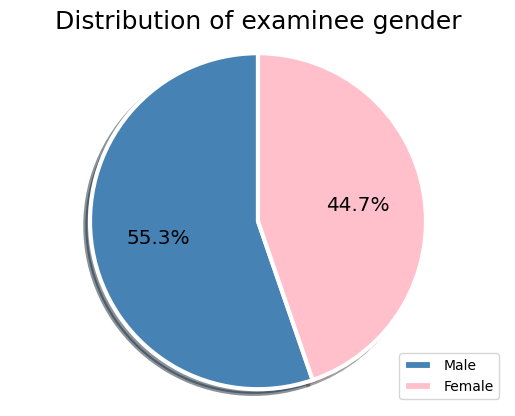

In [281]:
gender_counts.plot(kind = "pie", label="", ylabel=None, autopct='%.1f%%' , labels=None, colors=['SteelBlue','Pink'], shadow=True, startangle=90, wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
       textprops={'size': 'x-large'})
plt.title("Distribution of examinee gender", fontsize= 18)
plt.legend(labels=['Male','Female'], loc="lower right")
plt.rcParams['figure.dpi'] = 100
plt.axis('equal') #ensures that a circle will be drawn, not an ellipse
plt.savefig("Gender_distribution_pie.pdf", bbox_inches="tight")

##### Vowel types

In [283]:
vowel_counts = data['Vowel'].value_counts(dropna=False)
vowel_counts.drop(["error"], inplace=True)
vowel_counts = vowel_counts.iloc[1:]

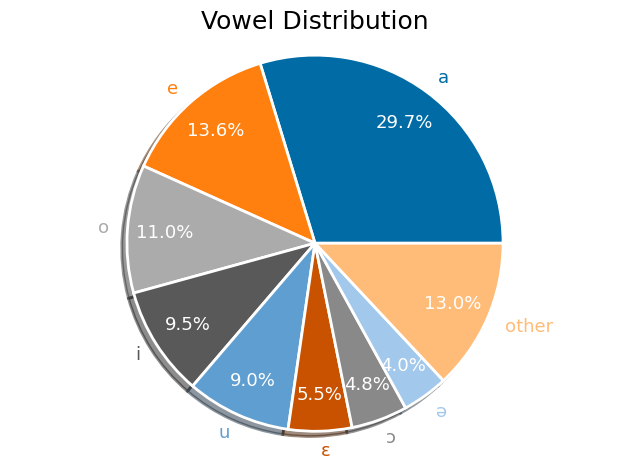

In [284]:
def my_autopct(pct):
    return ('%.1f%%' % pct) if pct > 3 else '' #shows the percentage marks only for slices with a 3% or more contribution

#iterate through the slices with percentages lower than about 4 percent and group them all into an "Other" slice
dic = vowel_counts.to_dict()
import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'other' if (dic[k]<400) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

patches, texts, pcts = ax.pie(
    sizes, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops={'size': 13}, pctdistance=0.8, shadow=True)
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=100)

ax.set_title('Vowel Distribution', fontsize=18)
plt.xlabel(""); plt.ylabel("")
ax.axis('equal') #ensures that a circle will be drawn, not an ellipse
plt.tight_layout()
plt.rcParams['figure.dpi'] = 100
fig.savefig("Vowel_distribution_pie.pdf", bbox_inches="tight")

Under the assumption that "C" in the column *"Oral/nasal"* refers to *"Closed"* and thus to sounds nasal in nature, its values are alloted to the key "N" and the Series key "C" is deleted

##### Oral/Nasal distribution

In [287]:
oral_nasal_counts = data['Oral/Nasal'].value_counts(dropna=True)
oral_nasal_counts["N"] = oral_nasal_counts["N"] + oral_nasal_counts["C"]
del oral_nasal_counts["C"]

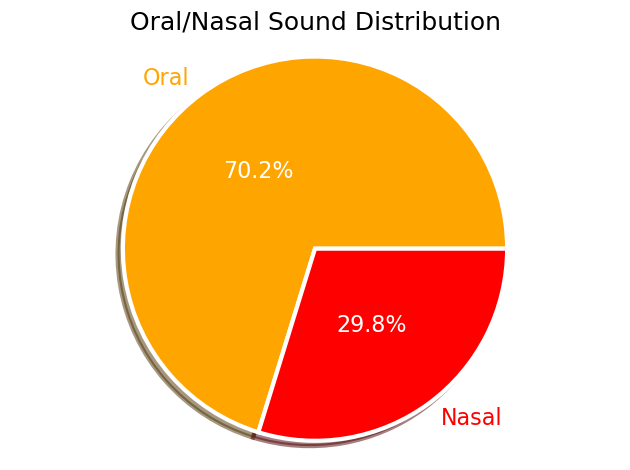

In [288]:
dic2 = oral_nasal_counts.to_dict()

labels = dic2.keys()
sizes = dic2.values()

fig, ax = plt.subplots()

patches, texts, pcts = ax.pie(
    sizes, labels=["Oral", "Nasal"], autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 16}, pctdistance=0.5, colors=["orange","r"], shadow=True)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=100)

ax.set_title('Oral/Nasal Sound Distribution', fontsize=18)
plt.xlabel(""); plt.ylabel("")
ax.axis('equal') #ensures that a circle will be drawn, not an ellipse
plt.tight_layout()
plt.rcParams['figure.dpi'] = 100
fig.savefig("Sound_distribution_pie.pdf", bbox_inches="tight")

##### Distribution of recorded audio duration

<Axes: ylabel='Frequency'>

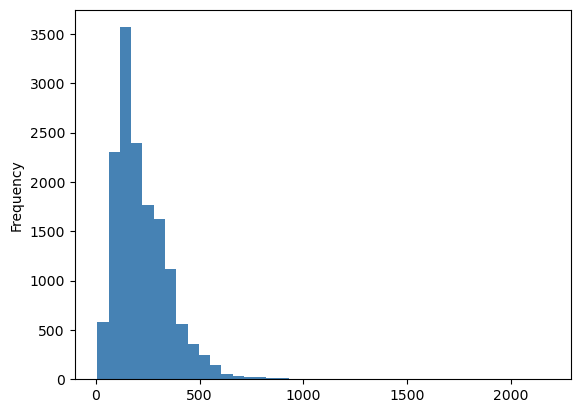

In [290]:
data["Duration"].plot(kind="hist", bins=40, color="steelblue")

##### Distribution of the quantity CQ_mean

<Axes: ylabel='Frequency'>

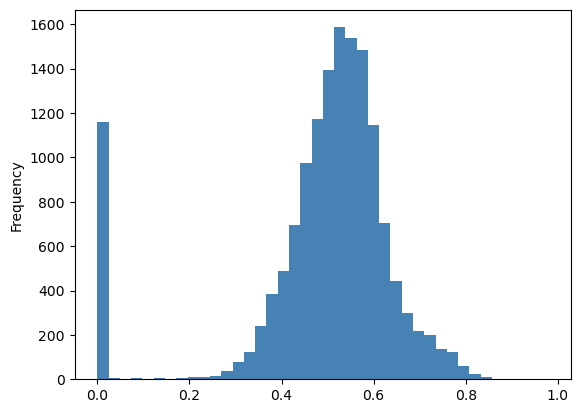

In [292]:
data["CQ_mean"].plot(kind="hist", bins=40, color="steelblue")

It is visible that the given distribution has unwanted noise in the sub-0.1 region. They are to be removed because they are assumed to be non-sensical.

In [294]:
CQ_mean_data_cleaned = data['CQ_mean'][data['CQ_mean'] > 0.025]; CQ_mean_data_cleaned

0        0.455
1        0.573
2        0.455
3        0.549
4        0.470
         ...  
14801    0.601
14802    0.590
14803    0.577
14804    0.563
14805    0.612
Name: CQ_mean, Length: 13632, dtype: float64

Text(0.5, 0, 'CQ_mean')

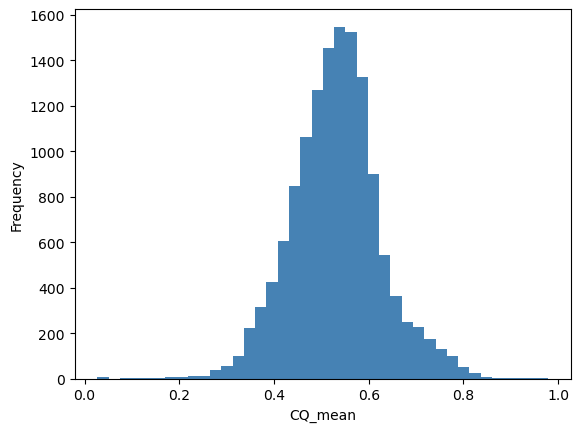

In [295]:
CQ_mean_data_cleaned.plot(kind="hist", bins=40, color="steelblue")
plt.xlabel("CQ_mean")

It is visible that the distribution of the quantity "CQ_mean" values tends to a normal distribution. Let us calculate the normal mean and standard deviation.

In [297]:
mu = CQ_mean_data_cleaned.mean(); mu

In [298]:
sigma = CQ_mean_data_cleaned.std(); sigma

This gives the average result of the normal mean as

$CQ_{mean}$ = $ 0.531 \pm 0.095 $ 

which can be compared with the original dataset on one graph.

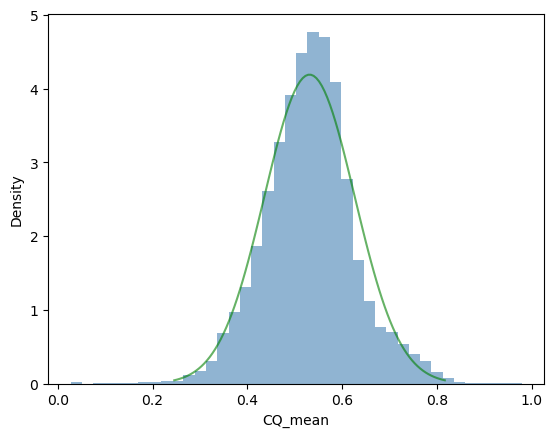

In [302]:
CQ_mean_data_cleaned.plot(kind="hist", bins=40, color="steelblue", alpha=0.6, density=True) #density=True kwarg ensures that the histogram is normalized
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), alpha=0.6, color="green")
plt.ylabel("Density")
plt.xlabel("CQ_mean")
plt.show()

The result for the mean and standard deviation is also in agreement with the integrated scipy method:

In [304]:
stats.norm.fit (CQ_mean_data_cleaned)